In [1]:
import ROOT

import os


from my_utils import *
from matplotlib import pyplot as plt
import numpy as np

data_dir = make_data_dir()

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,400)


Welcome to JupyROOT 6.14/04


In [2]:
clear_data_dir()

In [3]:

# prefer fully unpacked over previews

possible_file_names = [
 "joint_tree.root",
 "joint_tree_prev5000.root",
 "joint_tree_prev1000.root"
]

id="id01_"

## auto detect scan type ##

root_file_name = ""

for i in range(0,len(possible_file_names)):
  root_file_name = possible_file_names[i]
  file_list = os.popen('  find /workdir/data -iname "*{:s}" | grep {:s} | sort '.format(
    root_file_name,id)).read().split("\n")
  if (len(file_list) > 1):
    break

#print("len: {:d}".format(len(file_list)))
#file_list = file_list[0:60]
file_list

['/workdir/data/2019-11-07_18-05-31_pAC_id01_30_30s_x75.650/joint_tree.root',
 '/workdir/data/2019-11-07_18-06-06_pAC_id01_30_30s_x75.750/joint_tree.root',
 '/workdir/data/2019-11-07_18-06-40_pAC_id01_30_30s_x75.850/joint_tree.root',
 '/workdir/data/2019-11-07_18-07-15_pAC_id01_30_30s_x75.950/joint_tree.root',
 '/workdir/data/2019-11-07_18-07-49_pAC_id01_30_30s_x76.050/joint_tree.root',
 '/workdir/data/2019-11-07_18-08-24_pAC_id01_30_30s_x76.150/joint_tree.root',
 '/workdir/data/2019-11-07_18-08-58_pAC_id01_30_30s_x76.250/joint_tree.root',
 '/workdir/data/2019-11-07_18-09-33_pAC_id01_30_30s_x76.350/joint_tree.root',
 '/workdir/data/2019-11-07_18-10-07_pAC_id01_30_30s_x76.450/joint_tree.root',
 '/workdir/data/2019-11-07_18-10-42_pAC_id01_30_30s_x76.550/joint_tree.root',
 '/workdir/data/2019-11-07_18-11-16_pAC_id01_30_30s_x76.650/joint_tree.root',
 '/workdir/data/2019-11-07_18-11-51_pAC_id01_30_30s_x76.750/joint_tree.root',
 '/workdir/data/2019-11-07_18-12-25_pAC_id01_30_30s_x76.850/join

In [4]:
import re

X =  []
PHI =  []
THR = []
MICRO = []

print ("X")

pattern =  re.compile(".*_x([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    x = match.groups()[0]
    X += [float(x)]

print (X)

X
[75.65, 75.75, 75.85, 75.95, 76.05, 76.15, 76.25, 76.35, 76.45, 76.55, 76.65, 76.75, 76.85, 76.95, 77.05, 77.15, 77.25, 77.35, 77.45, 77.55, 77.65, 77.75, 77.85, 77.95, 78.05, 78.15, 78.25, 78.35, 78.45, 78.55, 78.65, 78.75, 78.85, 78.95, 79.05, 79.15, 79.25, 79.35, 79.45, 79.55, 79.65, 79.75, 79.85, 79.95, 80.05, 80.15, 80.25, 80.35, 80.45, 80.55, 80.65, 80.75, 80.85, 80.95, 81.05, 81.15, 81.25, 81.35, 81.45, 81.55, 81.65, 81.75, 81.85, 81.95, 82.05, 82.15, 82.25, 82.35, 82.45, 82.55, 82.65, 82.75, 82.85, 82.95, 83.05, 83.15, 83.25, 83.35, 83.45, 83.55, 83.65, 83.75, 83.85, 83.95, 84.05, 84.15, 84.25, 84.35, 84.45, 84.55, 84.65, 84.75, 84.85, 84.95, 85.05, 85.15, 85.25, 85.35, 85.45, 85.55, 85.65]


In [5]:
print ("PHI")

pattern =  re.compile(".*_phi([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    phi = match.groups()[0]
    PHI += [float(phi)]

print (PHI)

PHI
[]


In [6]:
print ("THR")

pattern =  re.compile(".*_thr([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    thr = match.groups()[0]
    THR += [float(thr)]

print (THR)

THR
[]


In [7]:
print ("MICRO")

pattern =  re.compile(".*_micro([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    micro = match.groups()[0]
    MICRO += [float(micro)]

print (MICRO)

MICRO
[]


In [8]:
# default variable
varname = "X"
#varname  = "THR"
#varname = "PHI"
#varname = "MICRO"

varname_list = ["X","THR","PHI","MICRO"]
len_list     = np.array([len(set(X)),len(set(THR)),len(set(PHI)),len(set(MICRO))])

varname = varname_list[ np.argmax(len_list) ]


In [9]:
#def extract_info(file):

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

const_list = []
mean_list = []
sigma_list = []
entries_list = []

fish_const_list = []
fish_mean_list = []
fish_sigma_list = []
fish_entries_list = []

const_list_scut = []
mean_list_scut = []
sigma_list_scut = []
entries_list_scut = []

const_list_scut_b = []
mean_list_scut_b = []
sigma_list_scut_b = []
entries_list_scut_b = []

fish_const_list_scut = []
fish_mean_list_scut = []
fish_sigma_list_scut = []
fish_entries_list_scut = []

VAR = X

if varname == "X":
  VAR = X
if varname == "THR":
  VAR = THR
if varname == "PHI":
  VAR = PHI
if varname == "MICRO":
  VAR = MICRO

for i in range(0,len(VAR)):
    
  file=file_list[i]
  var = VAR[i]

##################################################
##                    vw ana                    ##
##################################################


  f = ROOT.TFile(file)
  tree = f.Get("joint_tree")
  #tree.Draw("tot:t1 >> potato(500,0,500e-9,500,0,500e-9)",
  #          "wire == 10 && layer == 1 && chamber == 2",
  #          "colz")

  ### triggers for normalization
  tree.Draw("t1 >> t1(200,-200,800)",
            "chan == 35103",
            "colz")
  t1 = f.Get("t1")
  no_triggers = t1.GetEntries()

  print ("var: {:3.3f} {:s}, no_triggers: {:d}".format(var,varname,int(no_triggers)))
  

  ### t1 of desired wire, wide
  tree.Draw("t1 >> t1(1000,-200,800)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  c.SaveAs("{:s}/{:3.3f}_t1_wide.png".format(data_dir,var))

  ### t1 of desired wire
  tree.Draw("t1 >> t1(200,-50,100)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  t1 = f.Get("t1")
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
    

  fit = t1.GetFunction("gaus");

  try:
    const_list   += [fit.GetParameter(0)/no_triggers]
    mean_list    += [fit.GetParameter(1)]
    sigma_list   += [fit.GetParameter(2)]
    entries_list += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
  except:
    const_list   += [0]
    mean_list    += [0]
    sigma_list   += [0]
    entries_list += [0]
    
  c.SaveAs("{:s}/{:3.3f}_t1.png".format(data_dir,var))
  f.Close()
    
    
    
##################################################
##                   fish ana                   ##
##################################################
    
    
    
  f = ROOT.TFile(file.replace("joint_tree","correlation"))

  fish = f.Get("meta_fish_cut")
  fish.Draw("colz")
  c.SaveAs("{:s}/{:3.3f}_fish.png".format(data_dir,var))
  fish_proj_full= fish.ProjectionX("fish_proj_full", 1, 120) # 

  fish_proj= fish.ProjectionX("fish_proj", 61, 65) # -10/+10
  fish_proj.Draw()


  t1 = fish_proj
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
  ROOT.gStyle.SetOptFit(1)
  t1.Draw()  
  c.SaveAs("{:s}/{:3.3f}_fish_proj.png".format(data_dir,var))

  fit = t1.GetFunction("gaus");

  try:
    fish_const_list   += [fit.GetParameter(0)/no_triggers]
    fish_mean_list    += [fit.GetParameter(1)]
    fish_sigma_list   += [fit.GetParameter(2)]
    fish_entries_list += [(fish_proj_full.Integral(fish_proj_full.FindBin(0),fish_proj_full.FindBin(80)))/no_triggers]   
  except:
    fish_const_list   += [0]
    fish_mean_list    += [0]
    fish_sigma_list   += [0]
    fish_entries_list += [0]

##################################################
##                scinti_cut ana                ##
##################################################
  no_triggers = 1
  try:
    # number of triggers for normalization
    no_triggers = 1
    t1 = f.Get("scinti_t1_scinti_cut")
    no_triggers = t1.GetEntries()
    print ("var: {:3.3f} {:s}, scinti_cut no_triggers: {:d}".format(var,varname,int(no_triggers)))

    ### t1 of desired wire
    t1 = f.Get("wire_a_t1_scinti_cut")
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
      
    fit = t1.GetFunction("gaus");
    
    

    const_list_scut   += [fit.GetParameter(0)/no_triggers]
    mean_list_scut    += [fit.GetParameter(1)]
    sigma_list_scut   += [fit.GetParameter(2)]
    entries_list_scut += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
    
    c.SaveAs("{:s}/{:3.3f}_t1_scut.png".format(data_dir,var))
    
    ### t1 of desired wire
    t1 = f.Get("wire_b_t1_scinti_cut")
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
      
    fit = t1.GetFunction("gaus");
    
    

    const_list_scut_b   += [fit.GetParameter(0)/no_triggers]
    mean_list_scut_b    += [fit.GetParameter(1)]
    sigma_list_scut_b   += [fit.GetParameter(2)]
    entries_list_scut_b += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
    c.SaveAs("{:s}/{:3.3f}_t1_scut_b.png".format(data_dir,var))
  except:
    const_list_scut   += [0]
    mean_list_scut    += [0]
    sigma_list_scut   += [0]
    entries_list_scut += [0]
    const_list_scut_b   += [0]
    mean_list_scut_b    += [0]
    sigma_list_scut_b   += [0]
    entries_list_scut_b += [0]
    

##################################################
##                scinti_cut fish ana                ##
##################################################


  try:
    fish = f.Get("meta_fish_scinti_cut")
    fish.Draw("colz")
    c.SaveAs("{:s}/{:3.3f}_fish_scinti_cut.png".format(data_dir,var))
  
    fish_proj_full= fish.ProjectionX("fish_proj_full", 1, 120) # 
    fish_proj= fish.ProjectionX("fish_proj", 61, 65) # -10/+10
    fish_proj.Draw()
  
  
    t1 = fish_proj
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
    ROOT.gStyle.SetOptFit(1)
    t1.Draw()  
    c.SaveAs("{:s}/{:3.3f}_fish_proj_scinti_cut.png".format(data_dir,var))
  
    fit = t1.GetFunction("gaus");

    fish_const_list_scut   += [fit.GetParameter(0)/no_triggers]
    fish_mean_list_scut    += [fit.GetParameter(1)]
    fish_sigma_list_scut   += [fit.GetParameter(2)]
    fish_entries_list_scut += [(fish_proj_full.Integral(fish_proj_full.FindBin(0),fish_proj_full.FindBin(80)))/no_triggers]   
  except:
    fish_const_list_scut   += [0]
    fish_mean_list_scut    += [0]
    fish_sigma_list_scut   += [0]
    fish_entries_list_scut += [0]

  f.Close()




var: 75.650 X, no_triggers: 35612
var: 75.650 X, scinti_cut no_triggers: 1357
var: 75.750 X, no_triggers: 40206
var: 75.750 X, scinti_cut no_triggers: 4946
var: 75.850 X, no_triggers: 25165
var: 75.850 X, scinti_cut no_triggers: 1099
var: 75.950 X, no_triggers: 44518
var: 75.950 X, scinti_cut no_triggers: 4395
var: 76.050 X, no_triggers: 14728
var: 76.050 X, scinti_cut no_triggers: 771
var: 76.150 X, no_triggers: 47715
var: 76.150 X, scinti_cut no_triggers: 3059
var: 76.250 X, no_triggers: 13422
var: 76.250 X, scinti_cut no_triggers: 2357
var: 76.350 X, no_triggers: 48099
var: 76.350 X, scinti_cut no_triggers: 2373
var: 76.450 X, no_triggers: 18511
var: 76.450 X, scinti_cut no_triggers: 3677
var: 76.550 X, no_triggers: 44697
var: 76.550 X, scinti_cut no_triggers: 2256
var: 76.650 X, no_triggers: 30381
var: 76.650 X, scinti_cut no_triggers: 5222
var: 76.750 X, no_triggers: 35334
var: 76.750 X, scinti_cut no_triggers: 1695
var: 76.850 X, no_triggers: 40914
var: 76.850 X, scinti_cut no_tr

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_t1_wide.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_t1.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_fish.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_fish_proj.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_t1_scut.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.650_t1_scut_b.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/75.

In [10]:
len(entries_list_scut)

101

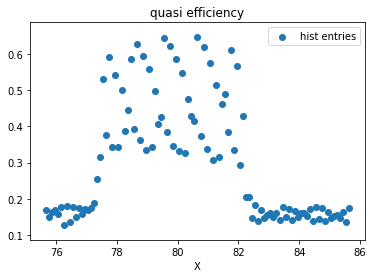

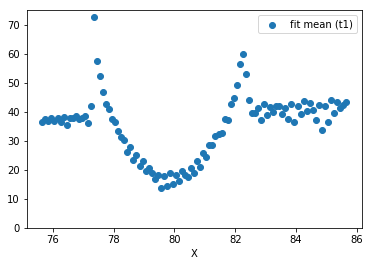

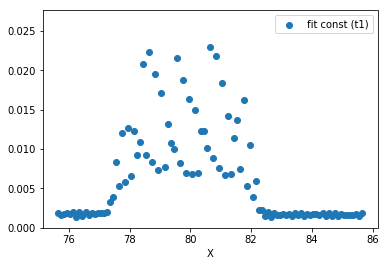

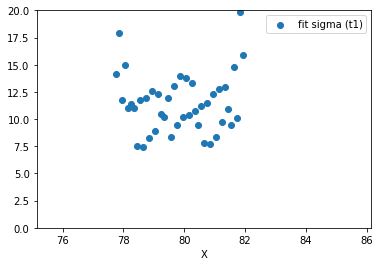

In [11]:
VAR = VAR[0:len(entries_list)]

##################################################
##                    vw ana                    ##
##################################################


plt.scatter(VAR,entries_list,label="hist entries")
#plt.plot(VAR,entries_list,label="hist entries")
#plt.ylim(0,np.max(entries_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency")
plt.show()

plt.scatter(VAR,mean_list,label="fit mean (t1)")
#plt.plot(VAR,mean_list,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.show()

plt.scatter(VAR,const_list,label="fit const (t1)")
#plt.plot(VAR,const_list,label="fit const (t1)")
plt.ylim(0,np.max(const_list)*1.2)
plt.legend()
plt.xlabel(varname)
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="fit sigma (t1)")

#plt.plot(VAR,sigma_list,label="fit sigma (t1)")
#plt.ylim(0,np.max(sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.show()

#area_list = np.array(const_list) * np.array(sigma_list)

#plt.scatter(VAR,area_list,label="gaus area")
#plt.ylim(0,np.max(area_list))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

saving to /workdir/jupyter/offline_quick_ana_combi_data/000.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/000.pickle


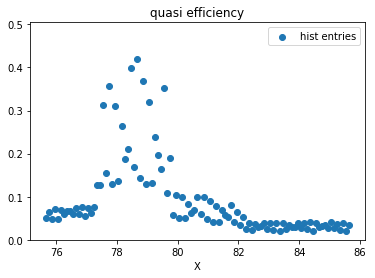

saving to /workdir/jupyter/offline_quick_ana_combi_data/001.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/001.pickle


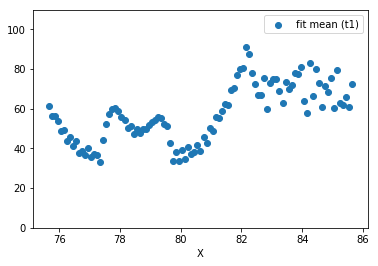

saving to /workdir/jupyter/offline_quick_ana_combi_data/002.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/002.pickle


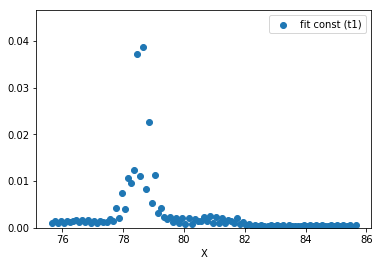

saving to /workdir/jupyter/offline_quick_ana_combi_data/003.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/003.pickle


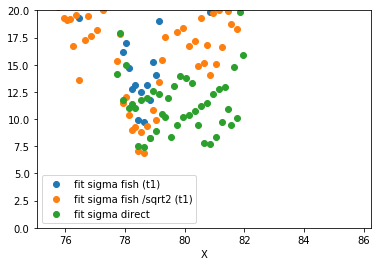

In [12]:
##################################################
##                   fish ana                   ##
##################################################


plt.scatter(VAR,fish_entries_list,label="hist entries")
#plt.plot(VAR,fish_entries_list,label="hist entries")
plt.ylim(0,np.max(fish_entries_list)*1.2)
plt.legend()
plt.title("quasi efficiency")
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_mean_list,label="fit mean (t1)")
#plt.plot(VAR,fish_mean_list,label="fit mean (t1)")
plt.ylim(0,np.max(fish_mean_list)*1.2)
plt.legend()
#plt.ylim(0,75)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_const_list,label="fit const (t1)")
#plt.plot(VAR,fish_const_list,label="fit const (t1)")
plt.ylim(0,np.max(fish_const_list)*1.2)
plt.legend()
#plt.ylim(0,0.3)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_sigma_list,label="fit sigma fish (t1)")
plt.scatter(VAR,np.array(fish_sigma_list)/np.sqrt(2),label="fit sigma fish /sqrt2 (t1)")
plt.scatter(VAR,sigma_list,label="fit sigma direct")
#plt.plot(VAR,fish_sigma_list,label="fit sigma (t1)")
plt.ylim(0,np.max(fish_sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
show(plt)



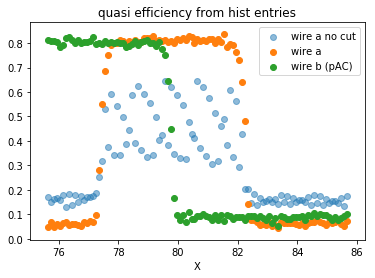

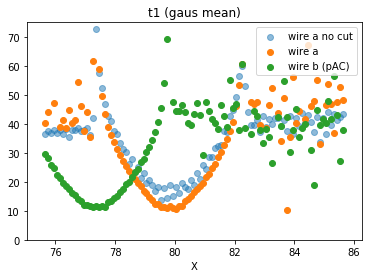

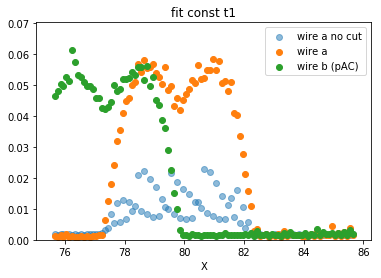

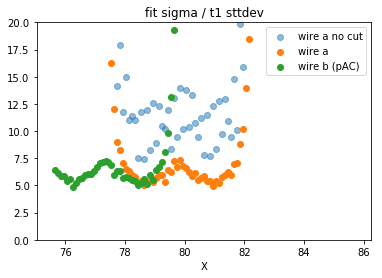

In [13]:


##################################################
##                scinti_cut ana                ##
##################################################



plt.scatter(VAR,entries_list,label="wire a no cut",alpha=0.5)
plt.scatter(VAR,entries_list_scut,label="wire a")
plt.scatter(VAR,entries_list_scut_b,label="wire b (pAC)")
#plt.plot(VAR,entries_list_scut,label="hist entries")
#plt.ylim(0,np.max(entries_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency from hist entries")
plt.show()

plt.scatter(VAR,mean_list,label="wire a no cut",alpha=0.5)
plt.scatter(VAR,mean_list_scut,label="wire a")
plt.scatter(VAR,mean_list_scut_b,label="wire b (pAC)")
#plt.plot(VAR,mean_list_scut,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.title("t1 (gaus mean)")
plt.show()

plt.scatter(VAR,const_list,label="wire a no cut",alpha=0.5)
plt.scatter(VAR,const_list_scut,label="wire a")
plt.scatter(VAR,const_list_scut_b,label="wire b (pAC)")
#plt.plot(VAR,const_list_scut,label="fit const (t1)")
plt.ylim(0,np.max(const_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("fit const t1")
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="wire a no cut",alpha=0.5)
plt.scatter(VAR,sigma_list_scut,label="wire a")
plt.scatter(VAR,sigma_list_scut_b,label="wire b (pAC) ")

#plt.plot(VAR,sigma_list_scut,label="fit sigma (t1)")
plt.ylim(0,np.max(sigma_list_scut)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.title("fit sigma / t1 sttdev")
plt.show()

#area_list_scut = np.array(const_list_scut) * np.array(sigma_list_scut)

#plt.scatter(VAR,area_list_scut,label="gaus area")
#plt.ylim(0,np.max(area_list_scut))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

saving to /workdir/jupyter/offline_quick_ana_combi_data/004.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/004.pickle


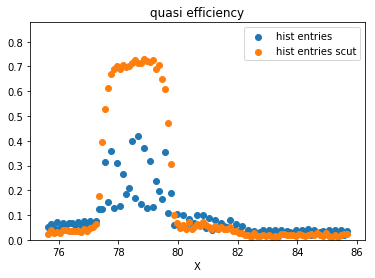

saving to /workdir/jupyter/offline_quick_ana_combi_data/005.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/005.pickle


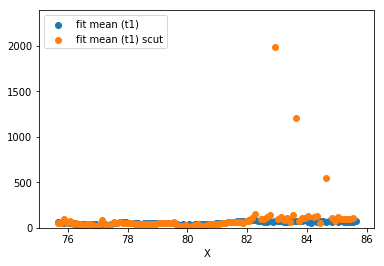

saving to /workdir/jupyter/offline_quick_ana_combi_data/006.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/006.pickle


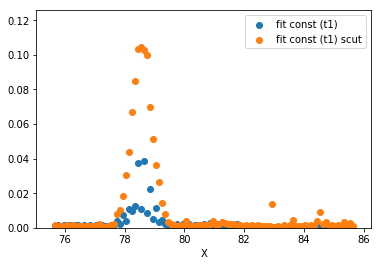

saving to /workdir/jupyter/offline_quick_ana_combi_data/007.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/007.pickle


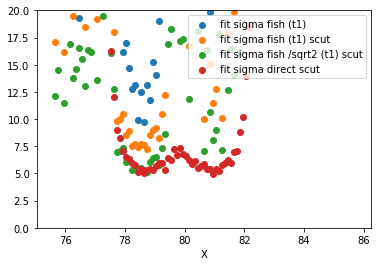

In [14]:
##################################################
##               scut    fish ana                   ##
##################################################


plt.scatter(VAR,fish_entries_list,label="hist entries")
plt.scatter(VAR,fish_entries_list_scut,label="hist entries scut")
#plt.plot(VAR,fish_entries_list_scut,label="hist entries")
plt.ylim(0,np.max(fish_entries_list_scut)*1.2)
plt.legend()
plt.title("quasi efficiency")
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_mean_list,label="fit mean (t1)")
plt.scatter(VAR,fish_mean_list_scut,label="fit mean (t1) scut")
#plt.plot(VAR,fish_mean_list_scut,label="fit mean (t1)")
plt.ylim(0,np.max(fish_mean_list_scut)*1.2)
plt.legend()
#plt.ylim(0,75)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_const_list,label="fit const (t1)")
plt.scatter(VAR,fish_const_list_scut,label="fit const (t1) scut")
#plt.plot(VAR,fish_const_list_scut,label="fit const (t1)")
plt.ylim(0,np.max(fish_const_list_scut)*1.2)
plt.legend()
#plt.ylim(0,0.3)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_sigma_list,label="fit sigma fish (t1)")
plt.scatter(VAR,fish_sigma_list_scut,label="fit sigma fish (t1) scut")
plt.scatter(VAR,np.array(fish_sigma_list_scut)/np.sqrt(2),label="fit sigma fish /sqrt2 (t1) scut")
plt.scatter(VAR,sigma_list_scut,label="fit sigma direct scut")
#plt.plot(VAR,fish_sigma_list_scut,label="fit sigma (t1)")
plt.ylim(0,np.max(fish_sigma_list_scut)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
show(plt)


In [15]:
#archive(label="{:s}_{:s}_{:s}".format(id,root_file_name,varname))